In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1 - Parametrical representation

#### Q 1 - Matrix coordinates

In [35]:
L = 3.
H = 1.

coord = np.array([
         [L,     H], 
         [L,   H/2],
         [L,     0],
         [L/2,   H],
         [L/2, H/2],
         [L/2,   0],
         [0,     H],
         [0,   H/2],
         [0,     0]
                  ])

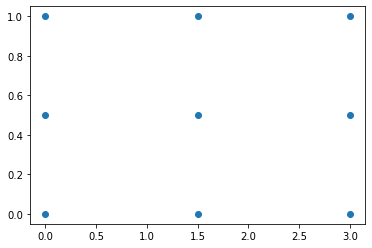

In [36]:
plt.plot(coord[:,0], coord[:,1], "o")

#### Q 2 - Connectivity Matrix

In [63]:
elements = np.array([
                   [5,2,1],
                   [5,3,2],
                   [5,6,3],
                   [5,9,6],
                   [5,8,9],
                   [5,7,8],
                   [5,4,7],
                   [5,1,4]
                    ])

# the order isn't what we must look at here. We rather look at the rotational direction (hour or anti-hour)

In [64]:
connect_python = elements - 1 # as the first term in python is 0
connect_python
# the order isn't what we must look at here. We rather look at the rotational direction (hour or anti-hour)

array([[4, 1, 0],
       [4, 2, 1],
       [4, 5, 2],
       [4, 8, 5],
       [4, 7, 8],
       [4, 6, 7],
       [4, 3, 6],
       [4, 0, 3]])

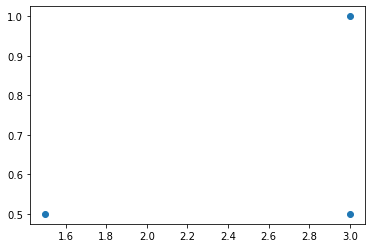

In [51]:
# displaying one element

plt.plot(coord[connect_python[0]][:,0], 
         coord[connect_python[0]][:,1], "o")

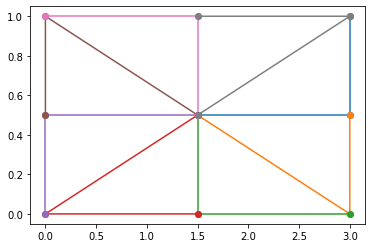

In [52]:
# displaying the mesh
for cell in connect_python:
    plt.plot(coord[cell][:,0], coord[cell][:,1], "o-")

#### Q3 - Shape function N_k(a)

In [53]:
import sympy as sp

In [54]:
def J(xs):
    return np.array(
        [[xs[0,0] - xs[2,0], xs[1,0] - xs[2,0]],
         [xs[0,1] - xs[2,1], xs[1,1] - xs[2,1]]
        ])

In [55]:
for i in range(len(connect_python)):
    coordinates_element = coord[connect_python[i]]
    Ji = J(coordinates_element)
    print(f"--------------------------------------------------------------")
    print(f"This is the Jacobian of the element {i+1} for L = {L}, H = {H}")
    print(f"J = {J(coordinates_element)}\n")
    print(f"The surface of element {i+1} is {np.linalg.det(Ji)/2}\n")


--------------------------------------------------------------
This is the Jacobian of the element 1 for L = 3.0, H = 1.0
J = [[-1.5  0. ]
 [-0.5 -0.5]]

The surface of element 1 is 0.375

--------------------------------------------------------------
This is the Jacobian of the element 2 for L = 3.0, H = 1.0
J = [[-1.5  0. ]
 [ 0.  -0.5]]

The surface of element 2 is 0.375

--------------------------------------------------------------
This is the Jacobian of the element 3 for L = 3.0, H = 1.0
J = [[-1.5 -1.5]
 [ 0.5  0. ]]

The surface of element 3 is 0.375

--------------------------------------------------------------
This is the Jacobian of the element 4 for L = 3.0, H = 1.0
J = [[ 0.  -1.5]
 [ 0.5  0. ]]

The surface of element 4 is 0.375

--------------------------------------------------------------
This is the Jacobian of the element 5 for L = 3.0, H = 1.0
J = [[1.5 0. ]
 [0.5 0.5]]

The surface of element 5 is 0.375

-----------------------------------------------------------

In [62]:
print("Surface total = %.2f m²" %(0.375*8))

Surface total = 3.00 m²
